<a href="https://colab.research.google.com/github/ahmedmustahid/Deep_Learn_Coursera/blob/master/Copy_of_Exercise_5_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# In this exercise you will train a CNN on the FULL Cats-v-dogs dataset
# This will require you doing a lot of data preprocessing because
# the dataset isn't split into training and validation for you
# This code block has all the required inputs
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [3]:
# This code block downloads the full Cats-v-Dogs dataset and stores it as 
# cats-and-dogs.zip. It then unzips it to /tmp
# which will create a tmp/PetImages directory containing subdirectories
# called 'Cat' and 'Dog' (that's how the original researchers structured it)
# If the URL doesn't work, 
# .   visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL

!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


--2019-10-19 01:11:01--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.36.68.33, 2600:1402:6800:283::e59, 2600:1402:6800:297::e59, ...
Connecting to download.microsoft.com (download.microsoft.com)|23.36.68.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M   187MB/s    in 4.2s    

2019-10-19 01:11:05 (185 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



In [6]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

# Expected Output:
# 12501
# 12501

12501
12501


In [18]:
os.getcwd()

'/content'

In [26]:
os.listdir("/tmp")

['PetImages', 'readme[1].txt', 'cats-and-dogs.zip', 'MSR-LA - 3467.docx']

In [0]:
import shutil
#shutil.rmtree("/content/test/")
shutil.rmtree("/content/cats_dogs/")

In [37]:
os.listdir("/content")

['.config', 'sample_data']

In [0]:
from pathlib import Path
p = Path("/tmp")


In [31]:
l = [item for item in p.iterdir()]
print(l)

[PosixPath('/tmp/PetImages'), PosixPath('/tmp/readme[1].txt'), PosixPath('/tmp/cats-and-dogs.zip'), PosixPath('/tmp/MSR-LA - 3467.docx')]


In [38]:
# Use os.mkdir to create your directories
# You will need a directory for cats-v-dogs, and subdirectories for training
# and testing. These in turn will need subdirectories for 'cats' and 'dogs'
from pathlib import Path
try:
    #YOUR CODE GOES HERE
    subdirs = ["test","train"]
    classifiers = ["cats","dogs"]
    
    for subdir in subdirs:
      for classifier in classifiers:
        p = Path("/tmp")/"cats-v-dogs"/subdir/classifier
        p.mkdir(parents=True,exist_ok=True)
        print(str(p))
except OSError:
    pass

/tmp/cats-v-dogs/test/cats
/tmp/cats-v-dogs/test/dogs
/tmp/cats-v-dogs/train/cats
/tmp/cats-v-dogs/train/dogs


In [39]:
os.listdir("/tmp/cats-v-dogs/test/")

['cats', 'dogs']

In [40]:
os.listdir("/tmp/cats-v-dogs/train/")

['cats', 'dogs']

In [58]:
# Write a python function called split_data which takes
# a SOURCE directory containing the files
# a TRAINING directory that a portion of the files will be copied to
# a TESTING directory that a portion of the files will be copie to
# a SPLIT SIZE to determine the portion
# The files should also be randomized, so that the training set is a random
# X% of the files, and the test set is the remaining files
# SO, for example, if SOURCE is PetImages/Cat, and SPLIT SIZE is .9
# Then 90% of the images in PetImages/Cat will be copied to the TRAINING dir
# and 10% of the images will be copied to the TESTING dir
# Also -- All images should be checked, and if they have a zero file length,
# they will not be copied over
#
# os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# os.path.getsize(PATH) gives you the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list
import random
def split_data(SOURCE, TRAIN, TEST, SPLIT_SIZE):
  psource=Path(SOURCE)
  ptrain= Path(TRAIN)
  ptest = Path(TEST)
 
  
  all_list = [all for all in psource.iterdir() if not all.stat().st_size == 0]
  #testlist = os.listdir(str(psource))
  print("alllist len", len(all_list))
  
  testsize=int((1-SPLIT_SIZE) *len(all_list))
  print("testsize", testsize)
  
  trainsize=int(SPLIT_SIZE *len(all_list))
  print("trainsize", trainsize)
  
  testlist = random.sample(all_list,testsize)
  trainlist = random.sample(all_list,trainsize)
  
  print(testlist[:10])
  
  for testfile in testlist:
    shutil.copy(str(testfile),TEST)
  
  for trainfile in trainlist:
    shutil.copy(str(trainfile),TRAIN)
  
# YOUR CODE STARTS HERE
# YOUR CODE ENDS HERE


CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/train/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/test/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/train/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/test/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Expected output
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

alllist len 12500
testsize 1249
trainsize 11250
[PosixPath('/tmp/PetImages/Cat/8649.jpg'), PosixPath('/tmp/PetImages/Cat/8006.jpg'), PosixPath('/tmp/PetImages/Cat/7208.jpg'), PosixPath('/tmp/PetImages/Cat/4592.jpg'), PosixPath('/tmp/PetImages/Cat/7485.jpg'), PosixPath('/tmp/PetImages/Cat/3817.jpg'), PosixPath('/tmp/PetImages/Cat/9643.jpg'), PosixPath('/tmp/PetImages/Cat/11597.jpg'), PosixPath('/tmp/PetImages/Cat/10789.jpg'), PosixPath('/tmp/PetImages/Cat/9972.jpg')]
alllist len 12500
testsize 1249
trainsize 11250
[PosixPath('/tmp/PetImages/Dog/8353.jpg'), PosixPath('/tmp/PetImages/Dog/10697.jpg'), PosixPath('/tmp/PetImages/Dog/11606.jpg'), PosixPath('/tmp/PetImages/Dog/798.jpg'), PosixPath('/tmp/PetImages/Dog/3690.jpg'), PosixPath('/tmp/PetImages/Dog/4151.jpg'), PosixPath('/tmp/PetImages/Dog/2169.jpg'), PosixPath('/tmp/PetImages/Dog/8936.jpg'), PosixPath('/tmp/PetImages/Dog/11912.jpg'), PosixPath('/tmp/PetImages/Dog/3562.jpg')]


In [59]:
print(len(os.listdir('/tmp/cats-v-dogs/train/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/train/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/test/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/test/dogs/')))

# Expected output:
# 11250
# 11250
# 1250
# 1250

12357
12381
2372
2381


In [0]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
# YOUR CODE HERE
    tf.keras.layers.Conv2D(64,(3,3),activation="relu",input_shape=(28,28,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [69]:
BATCH_SIZE = 64
IMG_HEIGHT = 28
IMG_WIDTH = 28

TRAINING_DIR = "/tmp/cats-v-dogs/train/"#YOUR CODE HERE
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) #YOUR CODE HERE
train_generator = train_datagen.flow_from_directory(directory=str(TRAINING_DIR), 
                                                     batch_size=BATCH_SIZE,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode = "binary") #YOUR CODE HERE

VALIDATION_DIR = "/tmp/cats-v-dogs/test"#YOUR CODE HERE
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) #YOUR CODE HERE
validation_generator = validation_datagen.flow_from_directory(directory=str(VALIDATION_DIR), 
                                                     batch_size=BATCH_SIZE,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode = "binary") #YOUR CODE HERE



# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 24736 images belonging to 2 classes.
Found 4753 images belonging to 2 classes.


In [70]:
history = model.fit_generator(train_generator,
                              epochs=15,
                              verbose=1,
                              validation_data=validation_generator)

# The expectation here is that the model will train, and that accuracy will be > 95% on both training and validation
# i.e. acc:A1 and val_acc:A2 will be visible, and both A1 and A2 will be > .9

Epoch 1/15
 14/387 [>.............................] - ETA: 1:13 - loss: 0.6969 - acc: 0.5056

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting t

 66/387 [====>.........................] - ETA: 57s - loss: 0.6923 - acc: 0.5294

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293863424 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expect

 75/387 [====>.........................] - ETA: 55s - loss: 0.6917 - acc: 0.5312

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 18350080 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 6. 
  warnings.warn(str(msg))


246/387 [==================>...........] - ETA: 24s - loss: 0.6735 - acc: 0.5764

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but 

285/387 [=====================>........] - ETA: 17s - loss: 0.6690 - acc: 0.5849

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 209715200 bytes but only got 0. Skipping tag 48
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 52428800 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6468665344 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 7027. Skipping tag 48
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expe

299/387 [======================>.......] - ETA: 15s - loss: 0.6675 - acc: 0.5873

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 307363840 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 307888128 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 328728576 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 5357. Skipping tag 513
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expe

349/387 [==========================>...] - ETA: 6s - loss: 0.6599 - acc: 0.5989

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 262146 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 262151 bytes but only got 0. Skipping tag 56
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 0. 
  warnings.warn(str(msg))


387/387 [==============================] - 82s 212ms/step - loss: 0.6540 - acc: 0.6073 - val_loss: 0.5789 - val_acc: 0.6979
Epoch 2/15
387/387 [==============================] - 79s 205ms/step - loss: 0.5805 - acc: 0.6949 - val_loss: 0.5581 - val_acc: 0.7090
Epoch 3/15
387/387 [==============================] - 80s 207ms/step - loss: 0.5344 - acc: 0.7302 - val_loss: 0.4740 - val_acc: 0.7747
Epoch 4/15
387/387 [==============================] - 80s 207ms/step - loss: 0.5059 - acc: 0.7504 - val_loss: 0.4915 - val_acc: 0.7553
Epoch 5/15
387/387 [==============================] - 80s 206ms/step - loss: 0.4698 - acc: 0.7759 - val_loss: 0.4031 - val_acc: 0.8142
Epoch 6/15
387/387 [==============================] - 79s 205ms/step - loss: 0.4484 - acc: 0.7885 - val_loss: 0.4109 - val_acc: 0.8060
Epoch 7/15
387/387 [==============================] - 80s 206ms/step - loss: 0.4227 - acc: 0.8040 - val_loss: 0.3548 - val_acc: 0.8489
Epoch 8/15
387/387 [==============================] - 82s 211ms/st

Text(0.5, 1.0, 'Training and validation loss')

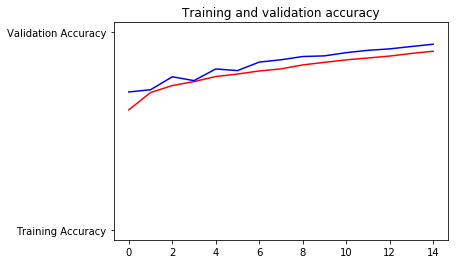

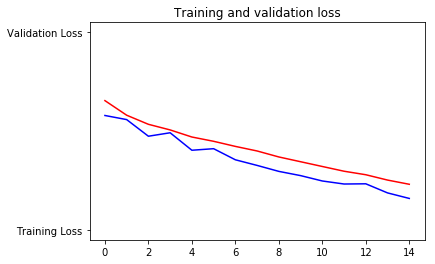

In [71]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

In [0]:
# Here's a codeblock just for fun. You should be able to upload an image here 
# and have it classified without crashing

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(# YOUR CODE HERE))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")